In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datasets import Dataset

In [2]:
colors_set = ['#40512D', '#5C733F', '#789451', '#A5A553', '#FFC857', '#E96356', '#714C3D', '#965369', '#B171CE', '#523646', '#793CEA']

In [3]:
# add color column to given data frame
def add_color_column(dataframe):
    colors = []
    for d in dataframe['label']:
        if d == 0:
            colors.append(colors_set[0])
        if d == 1:
            colors.append(colors_set[1])
        if d == 2:
            colors.append(colors_set[2])
        if d == 3:
            colors.append(colors_set[3])
        if d == 4:
            colors.append(colors_set[4])
        if d == 5:
            colors.append(colors_set[5])
        if d == 6:
            colors.append(colors_set[6])
        if d == 7:
            colors.append(colors_set[7])
        if d == 8:
            colors.append(colors_set[8])
        if d == 9:
            colors.append(colors_set[9])
        if d == 10:
            colors.append(colors_set[10])
    # add them to the data frame
    dataframe['colors'] = colors

In [4]:
# load KMeans labels
labels = np.load('../data/cluster_labels.npy')

In [5]:
# load 3d distance matrix
distance_matrix_3d = np.load('../data/3d_distance_matrix_tsne.npy')

In [6]:
# load data
videos = Dataset.load_from_disk('../data/videos')

In [7]:
# load 2d distance matrix
distance_matrix = np.load('../data/2d_distance_matrix_tsne.npy')

In [8]:
df_2d = pd.DataFrame(videos)
df_2d['label'] = labels
df_2d['x'] = distance_matrix[:,[0]]
df_2d['y'] = distance_matrix[:,[1]]
add_color_column(df_2d)

In [9]:
df_3d = pd.DataFrame(videos)
df_3d['label'] = labels
df_3d['x'] = distance_matrix_3d[:,[0]]
df_3d['y'] = distance_matrix_3d[:,[1]]
df_3d['z'] = distance_matrix_3d[:,[2]]
add_color_column(df_3d)

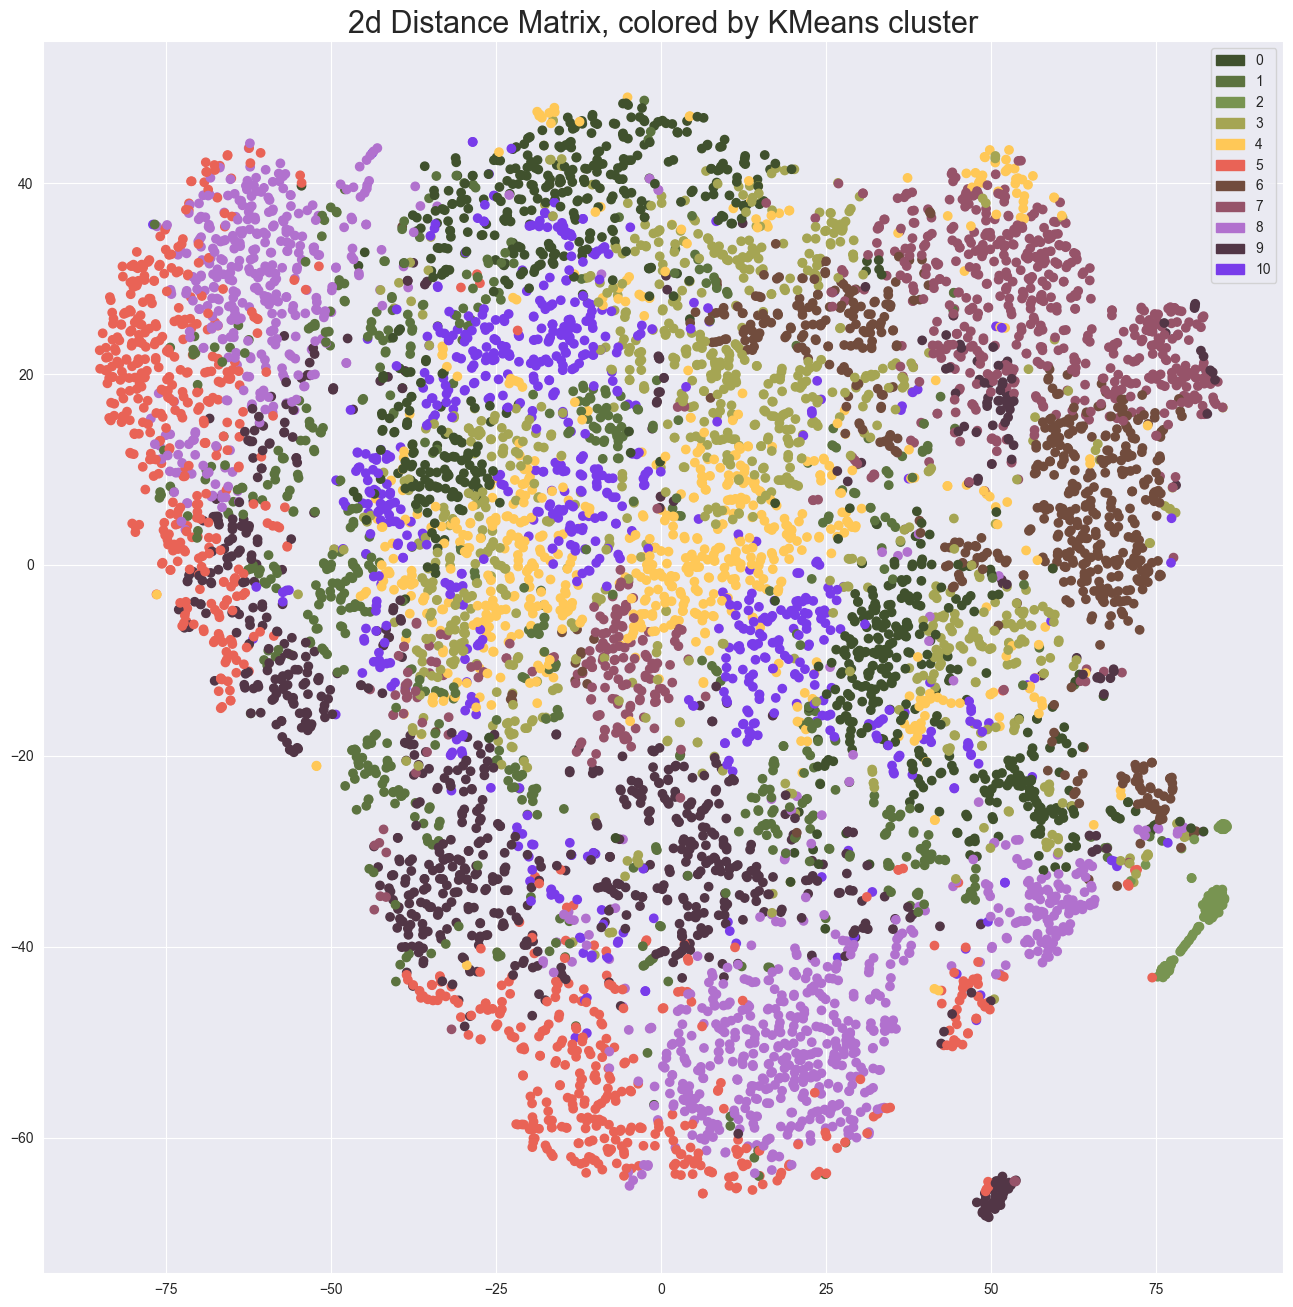

In [10]:
# Creating legend with color box
pop_a = mpatches.Patch(color=colors_set[1], label=1)
pop_b = mpatches.Patch(color=colors_set[2], label=2)
pop_c = mpatches.Patch(color=colors_set[3], label=3)
pop_d = mpatches.Patch(color=colors_set[4], label=4)
pop_e = mpatches.Patch(color=colors_set[5], label=5)
pop_f = mpatches.Patch(color=colors_set[6], label=6)
pop_g = mpatches.Patch(color=colors_set[0], label=0)
pop_h = mpatches.Patch(color=colors_set[7], label=7)
pop_i = mpatches.Patch(color=colors_set[8], label=8)
pop_j = mpatches.Patch(color=colors_set[9], label=9)
pop_k = mpatches.Patch(color=colors_set[10], label=10)
# create plot
fig, ax = plt.subplots(figsize=(16,16))
# set axis behind other elements
ax.set_axisbelow(True)
# scatter plot distance matrix
ax.scatter(df_2d['x'], df_2d['y'], c=df_2d['colors'])
# add title, legend
plt.title(f'2d Distance Matrix, colored by KMeans cluster', fontsize=22)
ax.legend(handles=[pop_g, pop_a, pop_b, pop_c, pop_d, pop_e, pop_f, pop_h, pop_i, pop_j, pop_k])

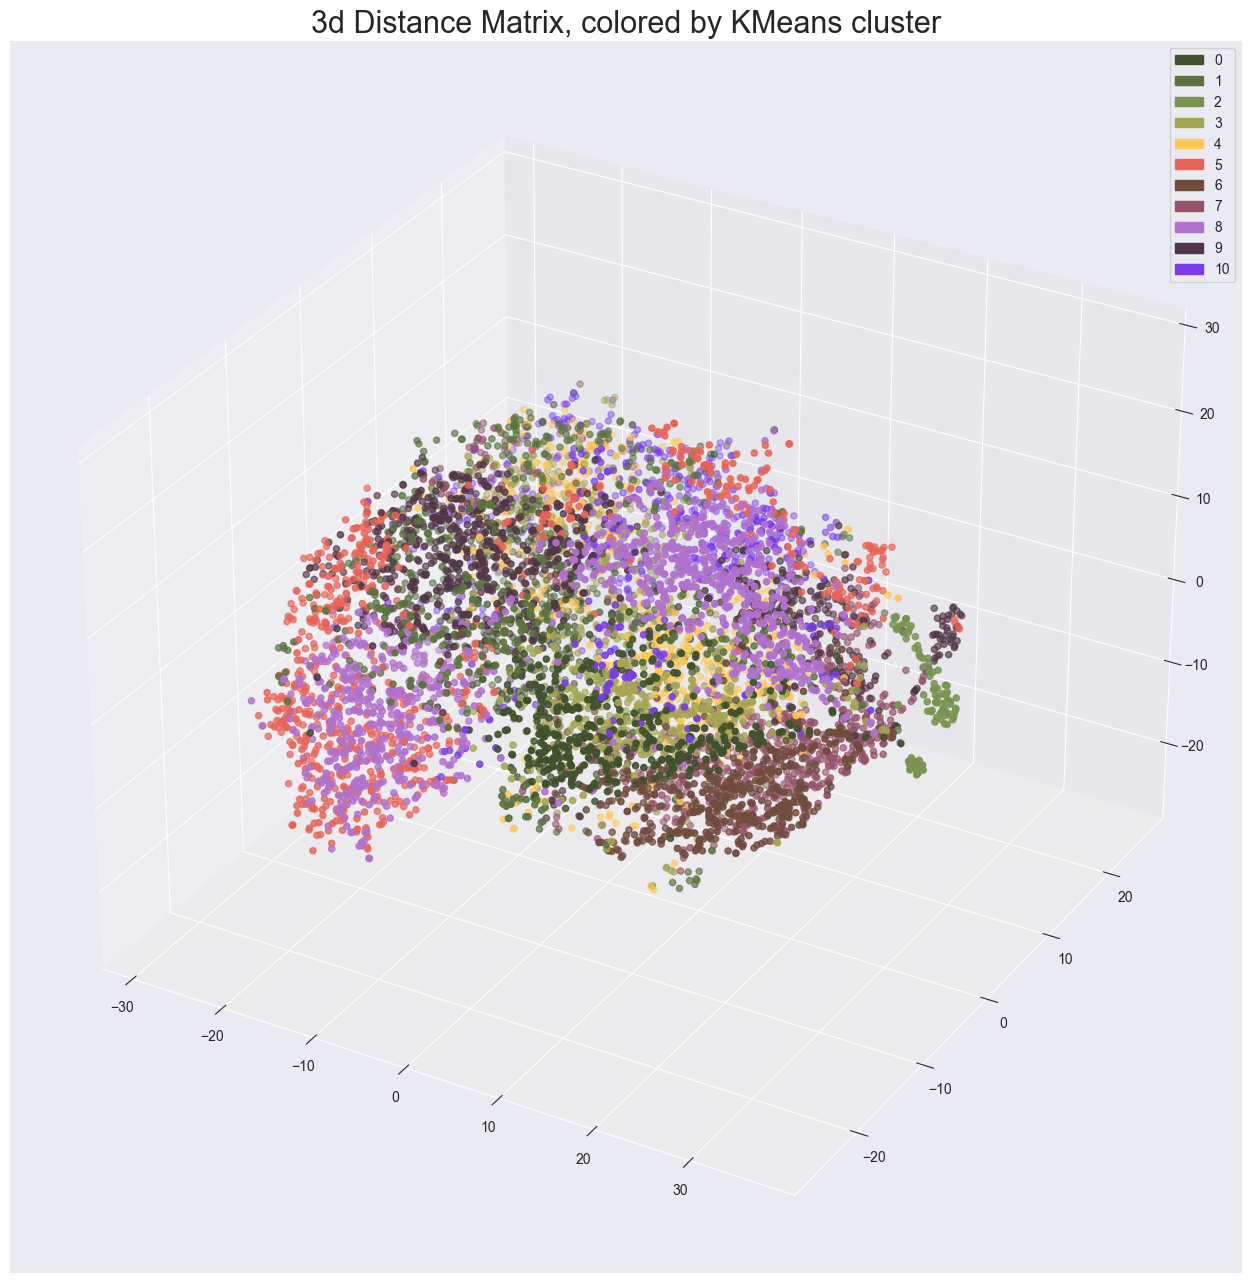

In [11]:
# Creating legend with color box
pop_a = mpatches.Patch(color=colors_set[1], label=1)
pop_b = mpatches.Patch(color=colors_set[2], label=2)
pop_c = mpatches.Patch(color=colors_set[3], label=3)
pop_d = mpatches.Patch(color=colors_set[4], label=4)
pop_e = mpatches.Patch(color=colors_set[5], label=5)
pop_f = mpatches.Patch(color=colors_set[6], label=6)
pop_g = mpatches.Patch(color=colors_set[0], label=0)
pop_h = mpatches.Patch(color=colors_set[7], label=7)
pop_i = mpatches.Patch(color=colors_set[8], label=8)
pop_j = mpatches.Patch(color=colors_set[9], label=9)
pop_k = mpatches.Patch(color=colors_set[10], label=10)
# create plot
figure = plt.figure(figsize=(16,16))
ax = figure.add_subplot(projection='3d')
# set axis behind other elements
ax.set_axisbelow(True)
# add grid
ax.grid()
# scatter plot distance matrix
ax.scatter(df_3d['x'], df_3d['y'], df_3d['z'], c=df_3d['colors'])
plt.title(f'3d Distance Matrix, colored by KMeans cluster', fontsize=22)
ax.legend(handles=[pop_g, pop_a, pop_b, pop_c, pop_d, pop_e, pop_f, pop_h, pop_i, pop_j, pop_k])